In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [10]:
measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [12]:
# Find the most recent date in the data set.
first_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(first_date)

('2017-08-23',)


In [13]:
# Calculate the date one year from the last date in data set.
year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp). filter(measurement.date >= year).all()



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation, columns = ["Date", "Precipitation"])
prcp_df = prcp_df.set_index("Date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date", ascending=True)

#clean up NaN
prcp_df.dropna(how="any", inplace=True)

prcp_df

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
selected = [measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs]
data = session.query(*selected).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
first_date = dt.date(2017,8,23)
year_from_first_date = first_date - dt.timedelta(days=365)
print("-"*70)
print(f"1 YEAR FROM FIRST DATE: {year_from_first_date}")
print("-"*70)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp). filter(measurement.date >= year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation, columns = ["Date", "Precipitation"])
precip_df = precip_df.set_index("Date")

# Sort the dataframe by date
precip_df.sort_values(by='Date', ascending=True, inplace=True)
precip_df.head()

----------------------------------------------------------------------
1 YEAR FROM FIRST DATE: 2016-08-23
----------------------------------------------------------------------


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<AxesSubplot:xlabel='Date'>

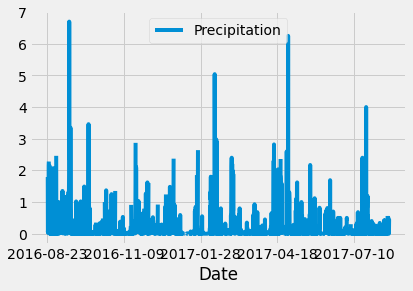

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figsize=(10,7)
precip_df.plot()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.dropna(how="any", inplace=True)
precip_df_summary = precip_df.groupby("Date")
precip_df_summary.Precipitation.describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2016-08-23,6.0,0.451667,0.706468,0.00,0.0275,0.100,0.5625,1.79
2016-08-24,6.0,1.555000,0.840541,0.08,1.2775,1.800,2.1500,2.28
2016-08-25,7.0,0.077143,0.071813,0.00,0.0300,0.080,0.0950,0.21
2016-08-26,6.0,0.016667,0.016330,0.00,0.0025,0.015,0.0275,0.04
2016-08-27,5.0,0.064000,0.081731,0.00,0.0000,0.020,0.1200,0.18
...,...,...,...,...,...,...,...,...
2017-08-19,3.0,0.030000,0.051962,0.00,0.0000,0.000,0.0450,0.09
2017-08-20,2.0,0.005000,0.007071,0.00,0.0025,0.005,0.0075,0.01
2017-08-21,3.0,0.193333,0.317700,0.00,0.0100,0.020,0.2900,0.56


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()
print("-"*30)
print(f"STATION COUNT: {station_count}")
print("-"*30)

------------------------------
STATION COUNT: 9
------------------------------


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
deg= '\u00b0'
top_station_id =  'USC00519281'
min = session.query(func.min(measurement.tobs)).filter(measurement.station==top_station_id).all()
max = session.query(func.max(measurement.tobs)).filter(measurement.station==top_station_id).all()
avg = session.query(func.avg(measurement.tobs)).filter(measurement.station==top_station_id).all()
print(f"MIN TEMPERATURE: {min[0][0]}{deg}")
print(f"MAX TEMPERATURE: {max[0][0]}{deg}")
print(f"AVG TEMPERATURE: {avg[0][0]:.2f}{deg}")

MIN TEMPERATURE: 54.0°
MAX TEMPERATURE: 85.0°
AVG TEMPERATURE: 71.66°


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.date).filter(measurement.station ==top_station_id).order_by(measurement.date.desc()).first() 
station_first_date = dt.date(2017,8,18)
year_range = station_first_date - dt.timedelta(days=365)
print(year_range)

station_data = [measurement.date, measurement.tobs]
tobs = session.query(*station_data).filter(measurement.station ==top_station_id).filter(measurement.date >= year_range).all()

top_station_df = pd.DataFrame(tobs, columns = ["Date", "Temperature"])

2016-08-18


In [20]:
top_station_df.head()

,Date,Temperature
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


<Figure size 720x432 with 0 Axes>

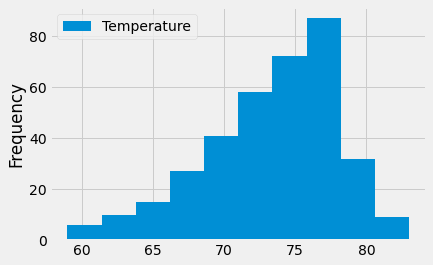

<Figure size 720x432 with 0 Axes>

In [21]:
top_station_df.plot(kind="hist")
plt.figure(figsize=(10,6))

# Close session

In [22]:
# Close Session
session.close()